### Bài thực hành số 5: Tiền xử lý dữ liệu 

In [4]:
# Câu 1: Đọc dữ liệu từ tập tin diemdh.csv vào dataframe với tên df. Tập fin diemdh.csv là điểm thi trung học phổ thông quốc gia.


# Cho biết dataframe df có bao nhiêu dòng và bao nhiêu cột
import pandas as pd
df = pd.read_csv('diemdh.csv')
so_dong, so_cot = df.shape
print("Dữ liệu df có", so_dong, "dòng và", so_cot, "cột.")


Dữ liệu df có 74444 dòng và 13 cột.


In [6]:
# Câu 2: Dựa vào dataframe df, hãy kiểm tra dữ liệu điểm môn toán (toan), môn văn (van) và môn tiếng Anh (ta)
# có dữ liệu không hợp lí không. Dữ liệu không hợp lí là giá trị Null hoặc giá trị không nằm từ 0 đến 10.
# Kiểm tra dữ liệu không hợp lý trong môn Toán (toan)
toan_khong_hop_li = df[(df['toan'].isnull()) | (df['toan'] < 0) | (df['toan'] > 10)]
if not toan_khong_hop_li.empty:
    print("Dữ liệu không hợp lý trong môn Toán (toan):")
    print(toan_khong_hop_li)

# Kiểm tra dữ liệu không hợp lý trong môn Văn (van)
van_khong_hop_li = df[(df['van'].isnull()) | (df['van'] < 0) | (df['van'] > 10)]
if not van_khong_hop_li.empty:
    print("\nDữ liệu không hợp lý trong môn Văn (van):")
    print(van_khong_hop_li)

# Kiểm tra dữ liệu không hợp lý trong môn Tiếng Anh (ta)
ta_khong_hop_li = df[(df['ta'].isnull()) | (df['ta'] < 0) | (df['ta'] > 10)]
if not ta_khong_hop_li.empty:
    print("\nDữ liệu không hợp lý trong môn Tiếng Anh (ta):")
    print(ta_khong_hop_li)


Dữ liệu không hợp lý trong môn Toán (toan):
           sbd    yy  toan   van  khxh  khtn    ls    dl  gdcd    sh    vl  \
801    2000803  2002  -1.0  7.50 -1.00  8.17 -1.00 -1.00 -1.00  8.75  7.25   
5358   2005362  2002  -1.0  6.00 -1.00  7.42 -1.00 -1.00 -1.00  4.75  9.25   
6001   2006010  2002  -1.0  6.25 -1.00  7.17 -1.00 -1.00 -1.00  6.50  8.50   
6078   2006087  2002  -1.0  7.00 -1.00  8.42 -1.00 -1.00 -1.00  8.00  8.75   
6365   2006377  2002  -1.0  6.75 -1.00  8.00 -1.00 -1.00 -1.00  8.00  7.50   
6448   2006460  2002  -1.0  6.75 -1.00  8.67 -1.00 -1.00 -1.00  9.50  6.50   
12281  2012299  2002  -1.0 -1.00 -1.00 -1.00 -1.00  0.00 -1.00 -1.00 -1.00   
23398  2023419  2002  -1.0  6.08 -1.00  7.08 -1.00 -1.00 -1.00  5.50  7.75   
28449  2028472  2002  -1.0  7.00 -1.00  8.75 -1.00 -1.00 -1.00  6.75  9.50   
28549  2028572  2002  -1.0  7.00 -1.00  8.25 -1.00 -1.00 -1.00  8.00  9.00   
28839  2028862  2002  -1.0  8.75 -1.00  9.08 -1.00 -1.00 -1.00  9.00  8.50   
31127  2031150  2001

In [8]:
# Câu 3: Tạo ra dataframe mới có tên là df_tva, df_tva bao gồm các cột số báo danh (Sbd), toán, văn, anh văn
# và chỉ bao gồm các giá trị nằm từ 0 đến 10.

# Xem dataframe df_tva có bao nhiêu dòng và bao nhiêu cột

import pandas as pd
df_tva = df.loc[(df['toan'].between(0, 10, inclusive=True)) & 
                (df['van'].between(0, 10, inclusive=True)) & 
                (df['ta'].between(0, 10, inclusive=True)), 
                ['Sbd', 'toan', 'van', 'ta']]
so_dong_df_tva, so_cot_df_tva = df_tva.shape
print("DataFrame df_tva có", so_dong_df_tva, "dòng và", so_cot_df_tva, "cột.")

DataFrame df_tva có 65049 dòng và 4 cột.


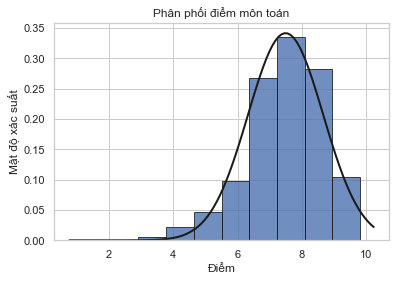

In [31]:
# Câu 4: Dựa vào dataframe df_tva, Vẽ đồ thị về phân phối của điểm môn toán
import numpy as np
from scipy.stats import norm
mean, std = norm.fit(df_tva.toan)
plt.figure(figsize=(6, 4))
plt.hist(df_tva.toan, bins=10, density=True, alpha=0.8, color='b', edgecolor='k')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Phân phối điểm môn toán')
plt.xlabel('Điểm')
plt.ylabel('Mật độ xác suất')
plt.show()

In [12]:
# Câu 5: Loại bỏ các outliers của điểm môn toán bằng 1 độ lệch chuẩn và lưu kết quả vào một dataframe có tên df_toan_std

# Xem Dataframe df_toan_std có bao nhiều và bao nhiêu cột
mean_toan = df_tva['toan'].mean()
std_toan = df_tva['toan'].std()
df_toan_std = df_tva[(df_tva['toan'] >= mean_toan - std_toan) & (df_tva['toan'] <= mean_toan + std_toan)]
so_dong_df_toan_std, so_cot_df_toan_std = df_toan_std.shape
print("DataFrame df_toan_std có", so_dong_df_toan_std, "dòng và", so_cot_df_toan_std, "cột.")


DataFrame df_toan_std có 46250 dòng và 4 cột.


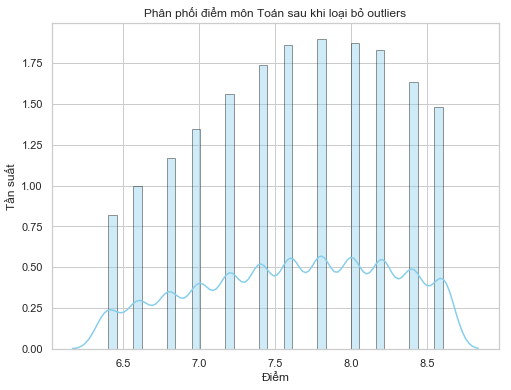

In [16]:
# Câu 6: Vẽ đồ thị về phân phối của môn toán sau khi loại bỏ các outliers bằng 1 độ lệch chuẩn
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.distplot(df_toan_std['toan'], kde=True, color='skyblue', hist_kws=dict(edgecolor="black", linewidth=1))
plt.title('Phân phối điểm môn Toán sau khi loại bỏ outliers')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

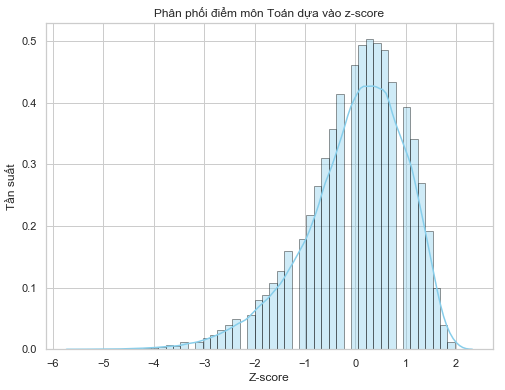

In [17]:
# Câu 7: Vẽ đồ thị phân phối điểm môn toán dựa vào zscore
import seaborn as sns
from scipy import stats
z_scores = stats.zscore(df_tva['toan'])
plt.figure(figsize=(8, 6))
sns.distplot(z_scores, kde=True, color='skyblue', hist_kws=dict(edgecolor="black", linewidth=1))
plt.title('Phân phối điểm môn Toán dựa vào z-score')
plt.xlabel('Z-score')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

In [18]:
# Câu 8: Loại bỏ các outliers của điểm môn toán bằng 1 độ lệch chuẩn dựa vào zscore
from scipy import stats
z_scores = stats.zscore(df_tva['toan'])
df_toan_std = df_tva[(z_scores > -1) & (z_scores < 1)]
print("DataFrame df_toan_std có", len(df_toan_std), "dòng và", len(df_toan_std.columns), "cột.")

DataFrame df_toan_std có 46250 dòng và 4 cột.


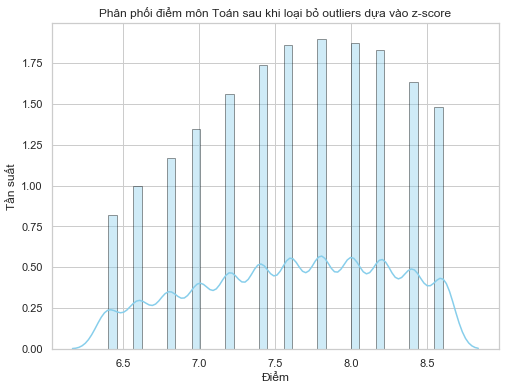

In [21]:
# Câu 9: Vẽ đồ thị về phân phối của môn toán sau khi loại bỏ các outliers bằng 1 độ lệch chuẩn dựa vào zscore
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.distplot(df_toan_std['toan'], kde=True, color='skyblue', hist_kws=dict(edgecolor="black", linewidth=1))
plt.title('Phân phối điểm môn Toán sau khi loại bỏ outliers dựa vào z-score')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

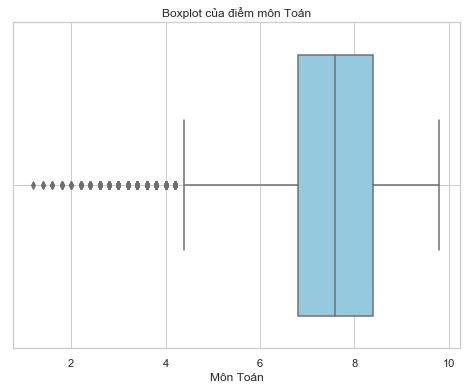

In [22]:
# Câu 10: Vẽ đồ thị boxplot để xem outliers của điểm môn toán
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='toan', data=df_tva, color='skyblue')
plt.title('Boxplot của điểm môn Toán')
plt.xlabel('Môn Toán')
plt.grid(True)
plt.show()

In [23]:
# Câu 11: Loại bỏ các outliers của điểm môn toán bằng IQR
# Tính toán các giá trị của IQR
Q1 = df_tva['toan'].quantile(0.25)
Q3 = df_tva['toan'].quantile(0.75)
IQR = Q3 - Q1

# Loại bỏ các outliers bằng IQR
df_toan_iqr = df_tva[~((df_tva['toan'] < (Q1 - 1.5 * IQR)) | (df_tva['toan'] > (Q3 + 1.5 * IQR)))]

# Xem thông tin về DataFrame df_toan_iqr
print("DataFrame df_toan_iqr có", len(df_toan_iqr), "dòng và", len(df_toan_iqr.columns), "cột.")

DataFrame df_toan_iqr có 64181 dòng và 4 cột.


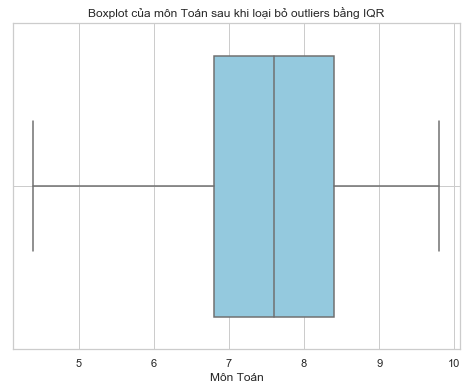

In [24]:
# Câu 12: Vẽ đồ thị boxplot của môn toán sau khi loại bỏ các outliers bằng IQR
# Tính toán phạm vi IQR
Q1 = df_tva['toan'].quantile(0.25)
Q3 = df_tva['toan'].quantile(0.75)
IQR = Q3 - Q1
df_toan_iqr = df_tva[(df_tva['toan'] >= Q1 - 1.5 * IQR) & (df_tva['toan'] <= Q3 + 1.5 * IQR)]
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_toan_iqr['toan'], color='skyblue')
plt.title('Boxplot của môn Toán sau khi loại bỏ outliers bằng IQR')
plt.xlabel('Môn Toán')
plt.grid(True)
plt.show()

In [25]:
# Câu 13: Dựa vào dataframe df_tva, hãy xem xét sự biến động điểm của môn toán, văn và anh văn bằng cách tính một chỉ số nào đó
# và rút ra kết luận
std_toan = df_tva['toan'].std()
std_van = df_tva['van'].std()
std_anh_van = df_tva['ta'].std()

print("Độ lệch chuẩn của điểm môn Toán:", std_toan)
print("Độ lệch chuẩn của điểm môn Văn:", std_van)
print("Độ lệch chuẩn của điểm môn Anh văn:", std_anh_van)

Độ lệch chuẩn của điểm môn Toán: 1.167880618546367
Độ lệch chuẩn của điểm môn Văn: 0.8408040947275585
Độ lệch chuẩn của điểm môn Anh văn: 1.7655923232248723


In [26]:
# Câu 14: Dựa vào dataframe df_tva,tiến hành rời rạc hóa điểm toán bằng cách thêm một cột xếp loại và cột xếp loại được xếp
# như sau: 8.5-10 -> Giỏi; 7-8.4 -> Khá; 5.5-6.9 -> TB; 4.0-5.4 -> TB Yếu; dưới 4-> Kém
def xep_loai(diem):
    if diem >= 8.5:
        return 'Giỏi'
    elif diem >= 7:
        return 'Khá'
    elif diem >= 5.5:
        return 'Trung Bình'
    elif diem >= 4:
        return 'Trung Bình Yếu'
    else:
        return 'Kém'
df_tva['xep_loai_toan'] = df_tva['toan'].apply(lambda x: xep_loai(x))
print(df_tva.head())

   Sbd  toan   van   ta xep_loai_toan
0  NaN   6.6  6.25  5.2    Trung Bình
1  NaN   8.2  7.75  7.0           Khá
2  NaN   6.8  6.75  6.0    Trung Bình
3  NaN   7.8  6.25  5.6           Khá
4  NaN   6.4  6.50  8.2    Trung Bình


In [29]:
# Câu 15: Dựa vào dataframe df_tva, thống kê xếp loại theo số lượng học sinh
import pandas as pd

# Xác định các khoảng xếp loại
bins = [0, 4, 5.4, 6.9, 8.4, 10]
labels = ['Kém', 'TB Yếu', 'TB', 'Khá', 'Giỏi']

# Tạo cột xếp loại mới
df_tva['Xep loai'] = pd.cut(df_tva['toan'], bins=bins, labels=labels)

# Thống kê xếp loại theo số lượng học sinh
xep_loai_count = df_tva['Xep loai'].value_counts()

# Hiển thị kết quả
print("Thống kê xếp loại theo số lượng học sinh:")
print(xep_loai_count)

Thống kê xếp loại theo số lượng học sinh:
Khá       34904
TB        13087
Giỏi      12895
TB Yếu     3516
Kém         647
Name: Xep loai, dtype: int64


In [30]:
# Câu 16: Dựa vào dataframe df_tva, thêm một cột mới vởi tên nor_toan và tiến hành normalization dựa vào giá trị min và max
# Tính toán giá trị min và max của cột 'toan'
toan_min = df_tva['toan'].min()
toan_max = df_tva['toan'].max()

# Thực hiện normalization và thêm cột mới 'nor_toan'
df_tva['nor_toan'] = (df_tva['toan'] - toan_min) / (toan_max - toan_min)

# Hiển thị DataFrame sau khi thêm cột mới
print(df_tva.head())

   Sbd  toan   van   ta xep_loai_toan Xep loai  nor_toan
0  NaN   6.6  6.25  5.2    Trung Bình       TB  0.627907
1  NaN   8.2  7.75  7.0           Khá      Khá  0.813953
2  NaN   6.8  6.75  6.0    Trung Bình       TB  0.651163
3  NaN   7.8  6.25  5.6           Khá      Khá  0.767442
4  NaN   6.4  6.50  8.2    Trung Bình       TB  0.604651
